# Hypothesis Testing

In this workbook we will be exploring different types of hypothesis test you may want to use as part of your analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In this workbook we will be using data about US college graduation rates, you can read the documentation <a href='https://www.kaggle.com/datasets/yashgpt/us-college-data'>here</a>.

In [3]:
college=pd.read_csv('data/College_Data.csv')

In [4]:
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


What would be a good hypothesis test for this data?

How about, is there a difference in mean graduation rates between private and public colleges?

To answer this we can do a statistical test, but to choose the correct one we need to know if our data is normally distributed. 

Fortunately, there are statistical tests to help us!

## Normality tests

Many models and statistical tests assume that the data is distributed normally (although we will see later with the central limit theorem that not being normally distributed isn't too much of a problem). There exist several tests that will examine if a dataset is normally distributed. 

They all have the following set of hypotheses:

<b>Null</b>: the sample has a normal distribution<br>
<b>Alternate</b>: the sample does not have a normal distribution

An assumption that all have is that each observation in the dataset are independent and identically distributed. This means that no datapoint should have an effect on another (we can assume this as each datapoint is a different university).

Let's take a look at graduation rates and test for normality at the 5% level.

First, let's plot the data to get an idea of what it is looking like:

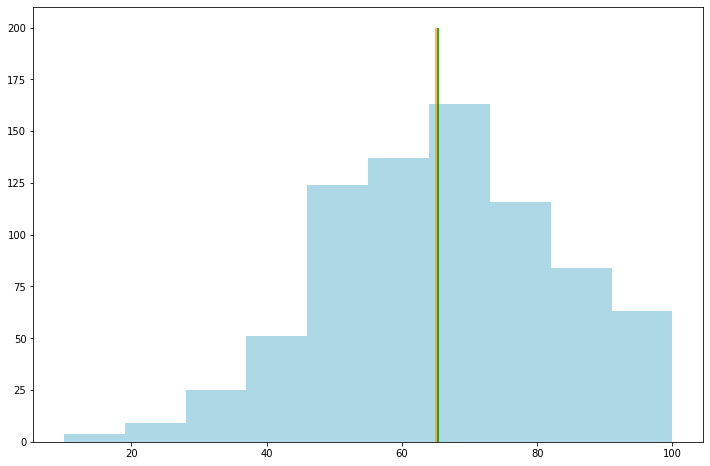

In [13]:
from statsmodels.graphics.gofplots import qqplot

grad=college['Grad.Rate']

fig, ax= plt.subplots(figsize=(12,8))
ax.hist(grad, color = 'lightblue') # Lightblue to make it easier to see the other colours
ax.vlines(grad.mean(), ymin=0, ymax=200, color='green', label='mean')
ax.vlines(grad.median(), ymin=0, ymax=200, color='orange', label='median')
plt.show()

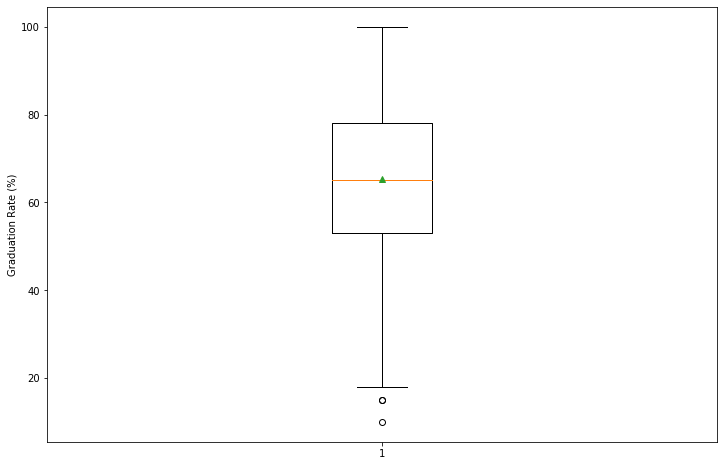

In [16]:
fig, ax= plt.subplots(figsize=(12,8))
ax.boxplot(grad, showmeans=True) # Orange line is the median
ax.set_ylabel('Graduation Rate (%)')
plt.show()

This <b>LOOKS</b> like a normal distribution, but let's check with a Q-Q plot.

A Q-Q plot is a plot of the quantiles of the data against the quantiles of the normal distribution. Although a quantile is not exactly the same as a percentile, the qqplot function uses them interchangeably. A percentile is the value below which a certain percentage of the data lies e.g. the 25th percentile is the value below which 25% of the data lies

If the data is perfectly normally distributed, the points should all fall on the line y=x.

e.g. the 25th percentile of the data should be the same as the 25th percentile of the normal distribution.

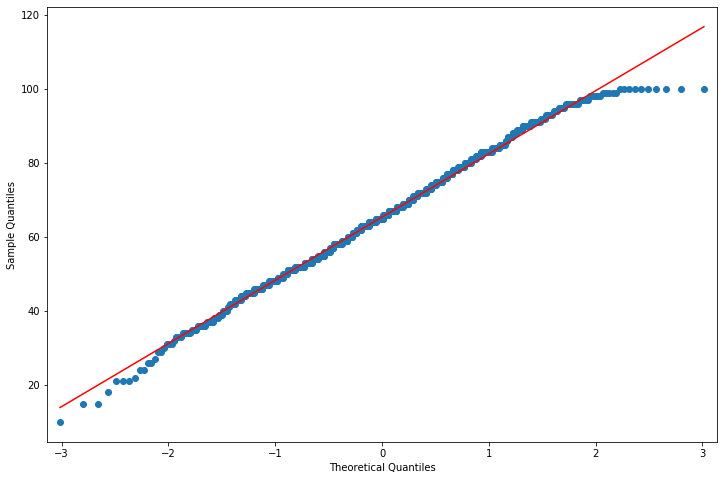

In [19]:
fig, ax= plt.subplots(figsize=(12,8))
qqplot(grad, line='s',ax=ax)
plt.show()

Plotting the data, like we did in Activate, makes it seem like it could be normally distributed. But let's now conduct some tests at the 5% level.

In [20]:
# Shapiro-Wilk test (for SMALL samples < 50)

from scipy.stats import shapiro

stat, p = shapiro(college['Grad.Rate'])
print(p)

0.0006583898211829364


The p-value here is less than 5% which means we should reject the null hypothesis, and conclude the data is not normally distributed. But how does this match up against what we plotted? 

An issue with the Shapiro-Wilk test is that as the dataset gets bigger, the more likely it is the null hypothesis will be rejected, as small deviations from normality are more easily detected.

This test should only be used with small datasets (i.e. less than 50 data points).

So, if you are using a large dataset like we are, a different test is needed.

In [6]:
# D'Agostino's K^2 Test (for LARGE samples > 50)

from scipy.stats import normaltest

stat, p = normaltest(college['Grad.Rate'])
print(p)

0.20071638274662004


D'Agostino has produced a p-value of 20% which means we fail to reject the null hypothesis and assume that the data is normally distributed.

A good analyst will use the correct test for their data, so make sure you know how big it is before attempting these tests.

<b>Note</b>, you should always visually inspect your data. A bimodal dataset may have the same mean and median, so these tests would say the data is normally distributed, even though its not. 

## t-test

For investigating whether the means of two independent samples are significantly different. It assumes that all observations are independent and identically distributed, all observations are normally distributed and that they all have the same variance.

<b>Null</b>: sample means are the same<br>
<b>Alternate</b>: sample means are different

Example: The government wants to test if there is a difference in the mean graduation rate of public and private universities at the 5% level.

<b>Null</b>: Graduation rates are the same <br>
<b>Alternate</b>: Graduation rates are different 

In [7]:
public=college[college.Private=='No']['Grad.Rate']
private=college[college.Private=='Yes']['Grad.Rate']

print('Public graduation rate: '+str(public.mean()))
print('Private graduation rate: '+str(private.mean()))

Public graduation rate: 56.04245283018868
Private graduation rate: 68.99823008849557


With nearly a 10% difference in average graduation rates, it seems they are different- but is this difference statistically significant?

In [8]:
from scipy.stats import ttest_ind # ind = independent

stat, p = ttest_ind(public,private)
# The t statistic is the mean of the difference between the two samples divided by the standard error of the difference
# You don't need to know this because you care about the p-value
# (The p-value is calculated from the t statistic but you don't need to do this calculation yourself!)
print(p)

5.56873026400316e-22


The p-value is 0.00000000000000000006% which is far below 5%, so we can reject the null hypothesis. There is a statistically significant difference between the graduation rates. The test doesn't explain why that is, only that there is a difference which needs to be investigated.

However, a t-test assumes that both sets of data are normally distributed. What happens if the data isn't? 

We can use other tests such as a Mann-Whitney U test. This has the same hypotheses as before, but different assumptions. First each observation must be independent and identically distributed, and that the data can be ranked.

In [9]:
from scipy.stats import mannwhitneyu
# Mann-Whitney U test is a non-parametric test for independent samples
# It uses the rank of the data instead of the data itself

stat, p = mannwhitneyu(public,private)
print(p)

2.192167517392635e-23


The p-value is still far below 5%, so we can reject the null hypothesis.

For comparing means between two populations there are loads of tests that exist. This <a href='https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/'>article</a> contains more that you can research. 

## Correlation Tests

When you plot a scatter graph you are checking for the correlation (relationship) between two variables. If, as one increases, the other also increases you would say they are positively correlated.

However, up to this point you have inspected this visually. There exists a family of tests that allow you to calculate the correlation in a more robust way.

For this example we will investigate the relationship between the average cost of staying at a university against its graduation rate. As we are investigating the effect of board cost on graduation rate, we will make the average cost the independent variable (x axis) and the graduation rate the dependent variable (y axis).

First let's plot them as a scatter graph:

In [10]:
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


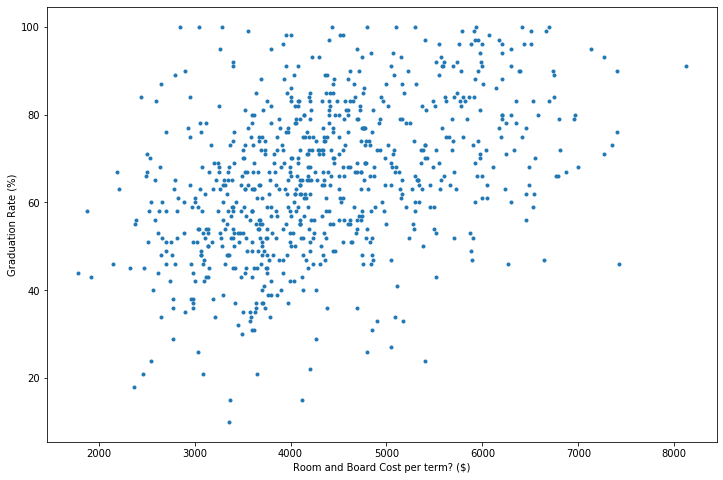

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(college['Room.Board'],college['Grad.Rate'],'.')
ax.set_xlabel('Room and Board Cost per term? ($)')
ax.set_ylabel('Graduation Rate (%)');

It <i>looks</i> like there might be a positive correlation between the two sets of data, implying that higher board costs have a positive effect on graduation rates. But let's check formally.

First we will use <b>Pearson's Correlation Coefficient</b> which tests if the two datasets have a linear relationship. It returns a correlation coefficient which is between -1 and 1, which describes the correlation. The closer it is to 1 or -1, the stronger (more linear) the correlation is. A correlation coefficient of 1 or -1 would be a straight line.

It also returns a p-value which we can use to assess the null hypothesis, which is as follows:

<b>Null</b>: The two datasets are not correlated <br>
<b>Alternate</b>: The two datasets are correlated

The test assumes that all observations are independent and identically distriuted, that each observation is normally distributed and each observation has the same variance.

So let's test if there is a correlation between accomodation cost and graduation rate at the 5% level.

In [23]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr

stat, p = pearsonr(college['Room.Board'],college['Grad.Rate'])

In [24]:
# Correlation coefficient

print(stat)

0.4258358978842441


This shows there is a positive correlation, but that it isn't particularly strong.

In [25]:
# p-value

print(p)

1.575998314821926e-35


As this is below 5% we can reject the null hypothesis that the two datasets are not correlated.

Now, this test again assumes a normal distribution. <b>What happens if either isn't normally distributed?</b>

We can use Spearman's Rank. This time the assumptions are that each observation is independent and identically distributed and that the data can be ranked.

The null and alternate hypothesis remain the same as before.

Let's test the relationship again at the 5% level.

In [26]:
from scipy.stats import spearmanr

stat, p = spearmanr(college['Room.Board'],college['Grad.Rate'])

In [27]:
print(stat)

0.43639697207539707


In [28]:
print(p)

2.028141340380198e-37


Again we are returned with a correlation coefficient (0.437) which implies a weak positive correlation, and a p-value less than 5%. We can reject the null hypothesis that the two datasets are not correlated.

So we can conclude there is a positive relationship between how much a university charges for accomodation and the graduation rate. So does that mean universities should increase accomodation costs to drive up graduation rates?

No, because while these tests check for correlation (relationship) they don't check for causality (does one actually have an effect on the other?). When investigating the relationship between two datasets you need to ensure you have done wider research so you can understand the context of the situation and not derive wrong conclusions.

Clearly, accomodation costs have no effect on graduation rates. The fact they are positively correlated will stem from a underlying cause that more expensive universities will have better funding and support for students, which will have an effect on graduation rates.

## Practice

In [18]:
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


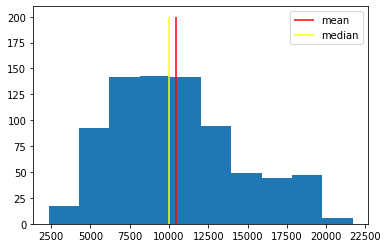

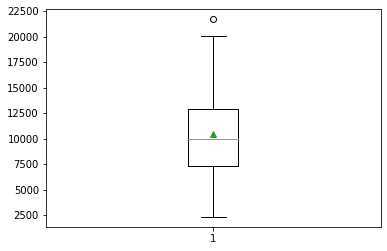

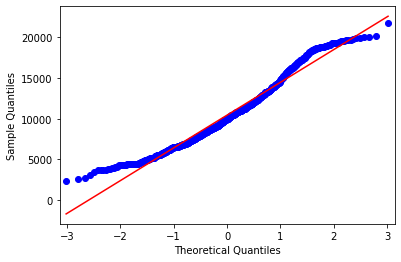

In [20]:
#1: Are the number of students who come from out of state normally distributed?
grad=college['Outstate']

plt.hist(grad)
plt.vlines(grad.mean(),ymin=0,ymax=200,color='red',label='mean')
plt.vlines(grad.median(),ymin=0,ymax=200,color='yellow',label='median')
plt.legend()
plt.show()
plt.boxplot(grad,showmeans=True)
qqplot(grad, line='s')
plt.show()

In [24]:
stat_s, p_s = shapiro(college['Outstate'])
print('Shapiro p-value: ' +str(p_s))

from scipy.stats import normaltest

stat_k, p_k = normaltest(college['Outstate'])
print("D'Agostino p-value: "+str(p_k))

Shapiro p-value: 4.178048965824965e-12
D'Agostino p-value: 3.226045083894409e-09


In [25]:
# Reject null, both tests are below 5% showing these are not normally distributed

In [26]:
#2: Is there a statistically significant difference in the mean acceptance rate of private and public universities? 
#Test at the 5% level.
public=college[college.Private=='No']['Accept']/college[college.Private=='No']['Apps']
private=college[college.Private=='Yes']['Accept']/college[college.Private=='Yes']['Apps']

print('Public graduation rate: '+str(public.mean()))
print('Private graduation rate: '+str(private.mean()))

Public graduation rate: 0.7265304809154447
Private graduation rate: 0.7545811798240266


In [28]:
stat_t, p_t = ttest_ind(public,private)
print('t-test p-value:' +str(p_t))
stat_m, p_m = mannwhitneyu(public,private)
print('mwu p-value: '+str(p_m))

t-test p-value:0.017809266352238933
mwu p-value: 0.0007763005106584003


In [29]:
# In both cases we reject the null hypothesis and accept the alternate that acceptance rates are not the same

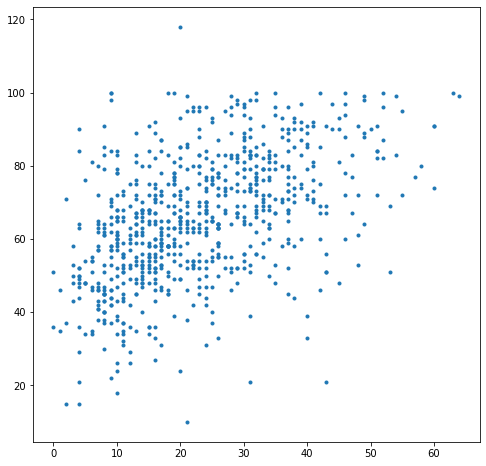

In [33]:
#3: Is there a correlation between the graduation rate and the percentage of alumni who donate?
# Test at the 5% level
fig,ax=plt.subplots(figsize=(8,8))
plt.plot(college['perc.alumni'],college['Grad.Rate'],'.')

In [34]:
stat_p, p_p = pearsonr(college['perc.alumni'],college['Grad.Rate'])
stat_s, p_s = spearmanr(college['perc.alumni'],college['Grad.Rate'])
print('Pearson p-value: '+str(p_p))
print('Spearman p-value: '+str(p_s))

Pearson p-value: 2.3038033437801254e-48
Spearman p-value: 4.972963784915353e-52


In [35]:
# Reject null hypothesis at 5% level, there is a correlation between the two variables

Stretch: Explore This <a href='https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/'>article</a> and try out some of the other tests.